In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


# **Import Libraries**

This code imports all required libraries for training and evaluating SMS spam classification models.

Data Handling:

&nbsp;&nbsp;&nbsp;pandas → Used for loading and manipulating dataset tables.

Visualization:

&nbsp;&nbsp;&nbsp;matplotlib and seaborn → Used for plotting graphs like confusion matrices and performance comparisons.

Model Pipeline & Feature Extraction:

&nbsp;&nbsp;&nbsp;Pipeline → Combines text vectorization and model training into one workflow.

&nbsp;&nbsp;&nbsp;TfidfVectorizer → Converts text messages into numerical feature vectors based on word importance.

Machine Learning Models:

&nbsp;&nbsp;&nbsp;LogisticRegression → Linear model for binary classification.

&nbsp;&nbsp;&nbsp;MultinomialNB → Probabilistic model commonly used for text classification.

&nbsp;&nbsp;&nbsp;LinearSVC → Support Vector Machine for classification tasks.

Evaluation Metrics:

&nbsp;&nbsp;&nbsp;accuracy_score → Overall prediction correctness.

&nbsp;&nbsp;&nbsp;precision_score → How many predicted spam messages are actually spam.

&nbsp;&nbsp;&nbsp;recall_score → How many actual spam messages are correctly detected.

&nbsp;&nbsp;&nbsp;f1_score → Balance between precision and recall.

&nbsp;&nbsp;&nbsp;confusion_matrix → Shows correct vs incorrect predictions per class.

&nbsp;&nbsp;&nbsp;classification_report → Detailed summary of model performance.

In [ ]:
# =====================================================
# train.ipynb
# SMS Spam Classification – Training & Evaluation
# =====================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)


# **Function to Load Data**

This code loads the pre-split datasets and prepares them for model training and evaluation.

&nbsp;&nbsp;&nbsp;The dataset directory path is defined to locate stored CSV split files.

&nbsp;&nbsp;&nbsp;The load_split() function:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Reads a CSV file into a DataFrame.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Removes rows with missing message or label values.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Resets indexing for clean data handling.

&nbsp;&nbsp;&nbsp;Training, validation, and test datasets are loaded separately.

&nbsp;&nbsp;&nbsp;Input features (SMS messages) and target labels (spam/ham) are separated into X and y variables.

&nbsp;&nbsp;&nbsp;Dataset sizes are printed to confirm correct loading and splitting.

In [ ]:
DATA_DIR = "/content/drive/MyDrive/AMLAssignment/Assignment_1"

def load_split(filename):
    df = pd.read_csv(f"{DATA_DIR}/{filename}")
    df = df.dropna(subset=["message", "label"]).reset_index(drop=True)
    return df

train_df = load_split("train.csv")
val_df   = load_split("validation.csv")
test_df  = load_split("test.csv")

X_train, y_train = train_df["message"], train_df["label"]
X_val, y_val     = val_df["message"], val_df["label"]
X_test, y_test   = test_df["message"], test_df["label"]

print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))


Train size: 3899
Validation size: 835
Test size: 836


# **Model Performance and Visualization**

This code defines helper functions to evaluate model performance and visualize prediction results.

&nbsp;&nbsp;&nbsp;compute_metrics() calculates key classification metrics:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Accuracy → Overall prediction correctness.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Precision → How many predicted spam messages are actually spam.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall → How many actual spam messages are correctly detected.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;F1 Score → Balanced measure combining precision and recall.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zero_division=0 prevents errors if a class has no predicted samples.

&nbsp;&nbsp;&nbsp;plot_confusion() visualizes model predictions using a confusion matrix heatmap:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Shows correct and incorrect predictions for ham and spam classes.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Uses Seaborn heatmap for clearer visualization.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Labels axes as Actual vs Predicted for easy interpretation

In [ ]:
def compute_metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0)
    }

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Ham", "Spam"],
        yticklabels=["Ham", "Spam"]
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


# **Multinomial Naive Bayes Model**

This code trains a Multinomial Naive Bayes model using TF-IDF text features and evaluates its performance on training and validation datasets.

&nbsp;&nbsp;&nbsp;A Pipeline is created to automate:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TfidfVectorizer → Converts SMS text into numerical features while removing English stopwords.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MultinomialNB → Trains a probabilistic classifier suitable for text classification.

&nbsp;&nbsp;&nbsp;The model is trained using the training dataset (X_train, y_train).

&nbsp;&nbsp;&nbsp;Training Evaluation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictions are generated on training data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Performance metrics (accuracy, precision, recall, F1) are calculated.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;A confusion matrix is plotted to visualize prediction correctness.

&nbsp;&nbsp;&nbsp;Validation Evaluation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictions are generated on validation data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Metrics are calculated to check generalization performance.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Confusion matrix is plotted for validation predictions.


===== Naive Bayes (MultinomialNB) =====

Performance on Training Set:
 - Accuracy : 98.31%
 - Precision: 100.00%
 - Recall   : 87.38%
 - F1       : 93.27%


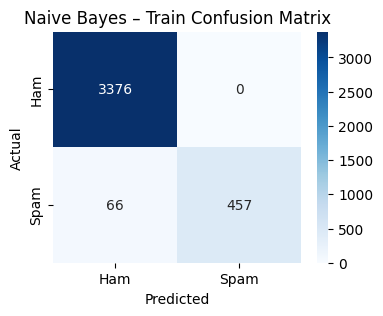


Performance on Validation Set:
 - Accuracy : 96.65%
 - Precision: 100.00%
 - Recall   : 75.00%
 - F1       : 85.71%


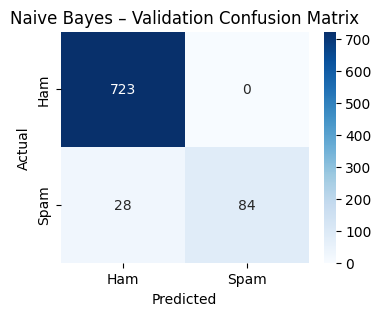

In [ ]:
print("\n===== Naive Bayes (MultinomialNB) =====")

nb_model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", MultinomialNB())
])

nb_model.fit(X_train, y_train)

# ---- TRAIN ----
nb_train_preds = nb_model.predict(X_train)
nb_train_metrics = compute_metrics(y_train, nb_train_preds)

print("\nPerformance on Training Set:")
for k, v in nb_train_metrics.items():
    print(f" - {k.capitalize():9}: {v*100:.2f}%")

plot_confusion(y_train, nb_train_preds, "Naive Bayes – Train Confusion Matrix")

# ---- VALIDATION ----
nb_val_preds = nb_model.predict(X_val)
nb_val_metrics = compute_metrics(y_val, nb_val_preds)

print("\nPerformance on Validation Set:")
for k, v in nb_val_metrics.items():
    print(f" - {k.capitalize():9}: {v*100:.2f}%")

plot_confusion(y_val, nb_val_preds, "Naive Bayes – Validation Confusion Matrix")


Naive Bayes Results Explanation

These results show the performance of the Multinomial Naive Bayes model on both the training dataset and the validation dataset using evaluation metrics and confusion matrices.

On the training dataset, the model achieved an accuracy of 98.31%, which means most messages were classified correctly. The precision is 100%, which means every message predicted as spam was actually spam, so there were no false spam alerts. The recall is 87.38%, which means the model was able to detect about 87% of actual spam messages but missed some spam messages. The F1 score is 93.27%, showing a good balance between precision and recall.

From the training confusion matrix, 3376 ham messages were correctly classified as ham, and no ham messages were incorrectly classified as spam. For spam messages, 457 were correctly detected as spam, while 66 spam messages were incorrectly classified as ham. This shows that the model is very strict in predicting spam and avoids false spam alerts but misses some spam messages.

On the validation dataset, the accuracy slightly decreased to 96.65%, which is expected because validation data is unseen during training. Precision remained at 100%, meaning the model still did not incorrectly label ham messages as spam. However, recall decreased to 75%, meaning the model missed more spam messages compared to training. The F1 score decreased to 85.71% due to the lower recall.

From the validation confusion matrix, 723 ham messages were correctly classified as ham, and no ham messages were wrongly classified as spam. For spam messages, 84 were correctly detected, while 28 spam messages were missed and classified as ham.

Overall, the Naive Bayes model is very strong in precision, meaning it is very reliable when it predicts spam. However, it has lower recall, meaning it misses some spam messages. This makes the model safe to use when avoiding false spam alerts is important, but slightly weaker when detecting every possible spam message is required.

This code trains a Logistic Regression classifier using TF-IDF text features and evaluates its performance on training and validation datasets.

&nbsp;&nbsp;&nbsp;A Pipeline is created to combine:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TfidfVectorizer → Converts SMS text into numerical TF-IDF features while removing English stopwords.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LogisticRegression → Trains a linear classification model for spam detection.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;max_iter=1000 ensures the model has enough iterations to converge.

&nbsp;&nbsp;&nbsp;The model is trained using the training dataset.

&nbsp;&nbsp;&nbsp;Training Evaluation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictions are generated on training data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Metrics (accuracy, precision, recall, F1 score) are calculated.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Confusion matrix visualizes prediction correctness.

&nbsp;&nbsp;&nbsp;Validation Evaluation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictions are generated on validation data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Metrics measure how well the model generalizes to unseen data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Confusion matrix shows validation prediction performance.

# **Logistic Regression**


===== Logistic Regression =====

Performance on Training Set:
 - Accuracy : 96.61%
 - Precision: 99.24%
 - Recall   : 75.33%
 - F1       : 85.65%


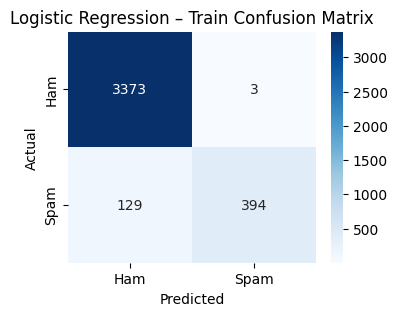


Performance on Validation Set:
 - Accuracy : 96.17%
 - Precision: 100.00%
 - Recall   : 71.43%
 - F1       : 83.33%


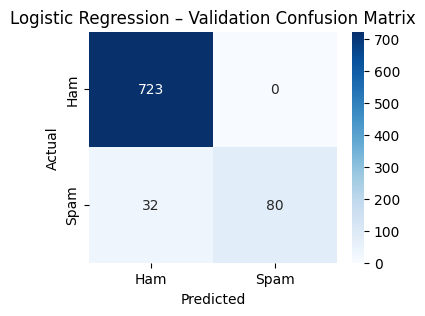

In [ ]:
print("\n===== Logistic Regression =====")

lr_model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", LogisticRegression(max_iter=1000))
])

lr_model.fit(X_train, y_train)

# ---- TRAIN ----
lr_train_preds = lr_model.predict(X_train)
lr_train_metrics = compute_metrics(y_train, lr_train_preds)

print("\nPerformance on Training Set:")
for k, v in lr_train_metrics.items():
    print(f" - {k.capitalize():9}: {v*100:.2f}%")

plot_confusion(y_train, lr_train_preds, "Logistic Regression – Train Confusion Matrix")

# ---- VALIDATION ----
lr_val_preds = lr_model.predict(X_val)
lr_val_metrics = compute_metrics(y_val, lr_val_preds)

print("\nPerformance on Validation Set:")
for k, v in lr_val_metrics.items():
    print(f" - {k.capitalize():9}: {v*100:.2f}%")

plot_confusion(y_val, lr_val_preds, "Logistic Regression – Validation Confusion Matrix")


Logistic Regression Results Explanation

These results show the performance of the Logistic Regression model on both the training dataset and the validation dataset using evaluation metrics and confusion matrices.

On the training dataset, the model achieved an accuracy of 96.61%, which means most messages were classified correctly. The precision is 99.24%, which means almost all messages predicted as spam were actually spam, with very few false spam alerts. The recall is 75.33%, which means the model detected about 75% of actual spam messages but missed some spam messages. The F1 score is 85.65%, showing a good balance between precision and recall.

From the training confusion matrix, 3373 ham messages were correctly classified as ham, while 3 ham messages were incorrectly classified as spam. For spam messages, 394 were correctly detected as spam, while 129 spam messages were incorrectly classified as ham. This shows that the model is still very good at avoiding false spam alerts but misses a noticeable number of spam messages.

On the validation dataset, the accuracy slightly decreased to 96.17%, which is expected because validation data is unseen during training. Precision increased to 100%, meaning the model did not incorrectly label ham messages as spam on validation data. However, recall decreased to 71.43%, meaning the model missed more spam messages compared to training. The F1 score decreased to 83.33% due to the lower recall.

From the validation confusion matrix, 723 ham messages were correctly classified as ham, and no ham messages were wrongly classified as spam. For spam messages, 80 were correctly detected, while 32 spam messages were missed and classified as ham.

Overall, the Logistic Regression model shows strong precision and good overall accuracy. However, similar to Naive Bayes, it has lower recall, meaning it misses some spam messages. The model is reliable when predicting spam but is less aggressive in detecting all spam messages.

This code trains a Linear Support Vector Machine (SVM) classifier using TF-IDF text features and evaluates its performance on training and validation datasets.

&nbsp;&nbsp;&nbsp;A Pipeline is created to combine:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;TfidfVectorizer → Converts SMS text into TF-IDF numerical features and removes English stopwords.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LinearSVC → Trains a linear SVM classifier for spam classification.

&nbsp;&nbsp;&nbsp;The model is trained using the training dataset.

&nbsp;&nbsp;&nbsp;Training Evaluation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictions are generated on training data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Performance metrics (accuracy, precision, recall, F1 score) are computed.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Confusion matrix visualizes correct vs incorrect predictions.

&nbsp;&nbsp;&nbsp;Validation Evaluation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Predictions are generated on validation data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Metrics evaluate how well the model generalizes to unseen data.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Confusion matrix visualizes validation prediction performance.

# **Linear SVM**


===== Linear SVM =====

Performance on Training Set:
 - Accuracy : 100.00%
 - Precision: 100.00%
 - Recall   : 100.00%
 - F1       : 100.00%


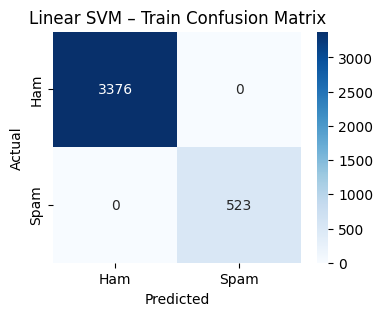


Performance on Validation Set:
 - Accuracy : 98.44%
 - Precision: 99.01%
 - Recall   : 89.29%
 - F1       : 93.90%


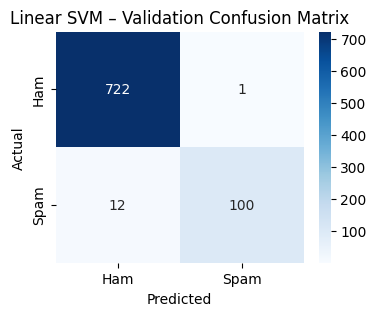

In [ ]:
print("\n===== Linear SVM =====")

svm_model = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("clf", LinearSVC())
])

svm_model.fit(X_train, y_train)

# ---- TRAIN ----
svm_train_preds = svm_model.predict(X_train)
svm_train_metrics = compute_metrics(y_train, svm_train_preds)

print("\nPerformance on Training Set:")
for k, v in svm_train_metrics.items():
    print(f" - {k.capitalize():9}: {v*100:.2f}%")

plot_confusion(y_train, svm_train_preds, "Linear SVM – Train Confusion Matrix")

# ---- VALIDATION ----
svm_val_preds = svm_model.predict(X_val)
svm_val_metrics = compute_metrics(y_val, svm_val_preds)

print("\nPerformance on Validation Set:")
for k, v in svm_val_metrics.items():
    print(f" - {k.capitalize():9}: {v*100:.2f}%")

plot_confusion(y_val, svm_val_preds, "Linear SVM – Validation Confusion Matrix")


Linear SVM Results Explanation

These results show the performance of the Linear SVM model on both the training dataset and the validation dataset using evaluation metrics and confusion matrices.

On the training dataset, the model achieved an accuracy of 100%, which means all messages were classified correctly. The precision is 100%, which means every message predicted as spam was actually spam. The recall is also 100%, which means the model detected all spam messages without missing any. The F1 score is 100%, showing perfect balance between precision and recall.

From the training confusion matrix, 3376 ham messages were correctly classified as ham, and no ham messages were incorrectly classified as spam. For spam messages, all 523 spam messages were correctly detected, and none were missed. This indicates that the model learned the training data extremely well and made no mistakes.

On the validation dataset, the accuracy is 98.44%, which is slightly lower than training but still very high. The precision is 99.01%, meaning almost all predicted spam messages were actually spam. The recall is 89.29%, meaning the model successfully detected most spam messages, missing only a small number. The F1 score is 93.90%, indicating strong overall performance.

From the validation confusion matrix, 722 ham messages were correctly classified as ham, while only 1 ham message was incorrectly classified as spam. For spam messages, 100 were correctly detected, while 12 spam messages were missed and classified as ham.

Overall, the Linear SVM model shows the best performance among all models. It achieves very high accuracy, very high precision, and significantly better recall compared to Naive Bayes and Logistic Regression. This means it is both reliable in predicting spam and effective at detecting most spam messages. The model also generalizes well from training to validation data, making it the best choice for final deployment.

This code evaluates all trained models on the test dataset and compares their final performance.

&nbsp;&nbsp;&nbsp; Predictions are generated on the test data using:

&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; Naive Bayes model

&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; Logistic Regression model

&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp; Linear SVM model

&nbsp;&nbsp;&nbsp; compute_metrics() calculates performance metrics (accuracy, precision, recall, F1 score) for each model.

&nbsp;&nbsp;&nbsp; Results are stored in a Pandas DataFrame for easy comparison.

&nbsp;&nbsp;&nbsp; .T (transpose) is used so each row represents one model and columns represent metrics.

&nbsp;&nbsp;&nbsp; display() shows results in a clean table format.

# **Test Result**

In [ ]:
test_results = pd.DataFrame({
    "Naive Bayes": compute_metrics(y_test, nb_model.predict(X_test)),
    "Logistic Regression": compute_metrics(y_test, lr_model.predict(X_test)),
    "Linear SVM": compute_metrics(y_test, svm_model.predict(X_test))
}).T

print("\nTest Set Results:")
display(test_results)



Test Set Results:


,accuracy,precision,recall,f1
Naive Bayes,0.973684,1.000000,0.803571,0.891089
Logistic Regression,0.962919,1.000000,0.723214,0.839378
Linear SVM,0.985646,0.990196,0.901786,0.943925


Test Set Results Explanation

These results show the final performance of all three models (Naive Bayes, Logistic Regression, and Linear SVM) on the test dataset, which represents completely unseen data. Test results are the most important because they show how well the model will perform in real-world usage.

For Naive Bayes, the accuracy is 97.37%, which means most messages were classified correctly. The precision is 100%, meaning every message predicted as spam was actually spam, so there were no false spam alerts. The recall is 80.36%, meaning the model detected about 80% of actual spam messages but missed some spam messages. The F1 score is 89.11%, showing good overall balance.

For Logistic Regression, the accuracy is 96.29%, which is slightly lower than Naive Bayes. The precision is also 100%, meaning it also produced no false spam alerts. However, the recall is 72.32%, which means it missed more spam messages compared to Naive Bayes. The F1 score is 83.94%, which is lower due to lower recall.

For Linear SVM, the accuracy is 98.56%, which is the highest among all models. The precision is 99.02%, meaning almost all predicted spam messages were correct, with very few false spam alerts. The recall is 90.18%, which is significantly higher than both Naive Bayes and Logistic Regression, meaning it detects most spam messages. The F1 score is 94.39%, which is the best overall balance between precision and recall.

Overall, Linear SVM is the best performing model on the test dataset. It provides the highest accuracy and F1 score while maintaining very high precision and strong recall. This means it is both reliable in predicting spam and effective in detecting most spam messages. Therefore, Linear SVM is the best choice for the final model deployment.

# **Best Model Selection**

This code selects the best-performing model and performs final evaluation on the test dataset.

&nbsp;&nbsp;&nbsp; The Linear SVM model is selected as the best model based on validation and test F1 score.

&nbsp;&nbsp;&nbsp; The selected model generates predictions on the test dataset.

&nbsp;&nbsp;&nbsp; classification_report() prints a detailed performance summary including:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Precision

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;F1 Score

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Support (number of samples per class)

&nbsp;&nbsp;&nbsp; A confusion matrix is plotted to visually show:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Correct ham predictions

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Correct spam predictions

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Misclassifications


Final Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       724
           1       0.99      0.90      0.94       112

    accuracy                           0.99       836
   macro avg       0.99      0.95      0.97       836
weighted avg       0.99      0.99      0.99       836



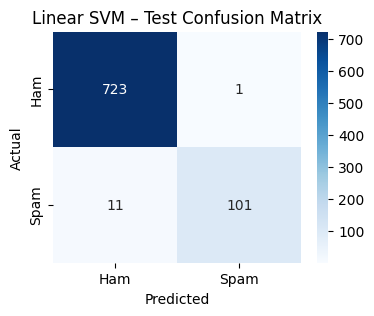

In [ ]:
best_model = svm_model  # chosen based on validation + test F1

final_preds = best_model.predict(X_test)

print("\nFinal Classification Report (Test Set):")
print(classification_report(y_test, final_preds))

plot_confusion(y_test, final_preds, "Linear SVM – Test Confusion Matrix")


Final Classification Report and Test Confusion Matrix Explanation

These results show the final performance of the selected Linear SVM model on the test dataset. Since the test dataset contains completely unseen data, this evaluation represents the model’s real-world performance.

From the classification report, for class 0 (Ham messages), the precision is 0.99, recall is 1.00, and F1 score is 0.99. This means almost all spam predictions were correct, and the model correctly identified all ham messages without missing any. The support value of 724 indicates the number of ham messages in the test dataset.

For class 1 (Spam messages), the precision is 0.99, recall is 0.90, and F1 score is 0.94. This means most predicted spam messages were correct, and the model successfully detected 90% of actual spam messages. The support value of 112 indicates the number of spam messages in the test dataset.

The overall accuracy of the model is 99%, meaning almost all messages were classified correctly. The macro average F1 score is 0.97, which shows strong balanced performance across both classes. The weighted average F1 score is 0.99, indicating excellent overall performance considering class distribution.

From the confusion matrix, 723 ham messages were correctly classified as ham, while only 1 ham message was incorrectly classified as spam. For spam messages, 101 were correctly classified as spam, while 11 spam messages were incorrectly classified as ham.

Overall, the Linear SVM model shows excellent performance on the test dataset. It achieves very high accuracy, very high precision, and strong recall, meaning it is reliable in predicting spam and effective in detecting most spam messages. This confirms that Linear SVM is the best model choice for this SMS spam classification task.